In [ ]:
### Reading multiple csv files with Spark


In [ ]:
# # Import our SparkSession so we can use it
# from pyspark.sql import SparkSession
# # Create our SparkSession, this can take a couple minutes locally
# spark = SparkSession.builder.appName("basics").getOrCreate()

In [ ]:
# # Load in data
# from pyspark import SparkFiles #same
# from pyspark.sql.functions import lag, col
# import pyspark.sql.functions as F
# url = "Resources/Turnstile_data/Turnstile_Usage_Data__2016.csv"
# df = spark.read.csv(url, header=True, mode="DROPMALFORMED")

# df.show() 

In [ ]:
# # Print our schema
# df.printSchema()

In [ ]:
# df.count()

In [ ]:
# #cleaned_df = df.groupby(["Station", "SCP"]).count().show()
# cleaned_df = ((df.withColumn('Turnstile', F.struct(df.SCP))
#    .groupBy('Station')
#    .pivot('SCP').agg(F.count('SCP')).show()))

In [ ]:
# import pandas as pd
# import numpy as np
# import pyspark.sql.functions as func
# import datetime as dt
# import re
# import time

# import matplotlib.pyplot as plt

# import seaborn as sns


In [ ]:
# grouped_turnstile = df.groupBy("Station").agg({'Entries': 'mean'}).collect()
# grouped_turnstile

In [ ]:
# df1 = spark.createDataFrame(grouped_turnstile)
# df1.show()

In [ ]:
# from pyspark.sql.types import DoubleType
# df1 = df1.withColumn("avg(Entries)", df1["avg(Entries)"].cast(DoubleType()))
# df1.show()


In [ ]:
# df2 = df1.withColumn("Avg_Entries", func.round(df1["avg(Entries)"], 2))
# df2.show()

In [ ]:
# from pyspark.sql.functions import avg
# display(type_df.groupBy("Station").avg("Entries"))

In [ ]:
# from pyspark.sql.functions import desc

# df2.sort(desc("Avg_Entries")).show()

In [ ]:
# pandas_df = df2.toPandas()
# pandas_df.head()

In [ ]:
# pandas_df_1 = pandas_df.iloc[0:10] # first 10 rows of dataframe
# pandas_df_1.head()

In [ ]:
# import matplotlib.gridspec as gridspec
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:

# df_1 = pandas_df_1["Station"]
# df_2 = pandas_df_1["Avg_Entries"]

# #Create a pie chart for top 10 categories
# plt.figure(1, figsize=(35,25))
# the_grid = gridspec.GridSpec(2, 2)
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# cmap = plt.get_cmap("Spectral")
# colors = [cmap(i) for i in np.linspace(0, 1, 10)]
# plt.subplot(the_grid[0, 0], aspect=1)
# plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
# pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

# #Create a legend
# plt.legend(df_1,
#          title= "Stations",
#          loc= "center left",
#          bbox_to_anchor=(1.2, 0.2, 0, 1))
# plt.show()

In [ ]:
# grouped_turnstile_Ex= df.groupBy("Station").agg({'Exits                                                     ': 'mean'}).collect()
# grouped_turnstile_Ex

In [ ]:
# df3 = spark.createDataFrame(grouped_turnstile_Ex)
# df3.show()

In [ ]:
# from pyspark.sql.types import DoubleType
# df4 = df3.withColumn("avg(Exits                                                     )", df3["avg(Exits                                                     )"].cast(DoubleType()))
# df4.show()


In [ ]:
# df5 = df4.withColumn("Avg_Exits", func.round(df4["avg(Exits                                                     )"], 2))
# df5.show()

In [ ]:
# from pyspark.sql.functions import desc

# df5.sort(desc("Avg_Exits")).show()

In [ ]:
# pandas_df_2 = df5.toPandas()
# pandas_df_2 = pandas_df_2.sort_values('Avg_Exits', ascending=False)


In [ ]:
# pandas_df_exits = pandas_df_2.iloc[0:10] # first 10 rows of dataframe
# pandas_df_exits

In [ ]:
# df_1_exits = pandas_df_exits["Station"]
# df_2_exits = pandas_df_exits['Avg_Exits']

# #Create a pie chart for top 10 categories
# plt.figure(1, figsize=(35,25))
# the_grid = gridspec.GridSpec(2, 2)
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# cmap = plt.get_cmap("Spectral")
# colors = [cmap(i) for i in np.linspace(0, 1, 10)]
# plt.subplot(the_grid[0, 0], aspect=1)
# plt.title("Top 10 Subway Stations with highest Exits", fontsize=20)
# pie = plt.pie(df_2_exits,labels = df_1_exits, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

# #Create a legend
# plt.legend(df_1_exits,
#          title= "Stations",
#          loc= "center left",
#          bbox_to_anchor=(1.2, 0.2, 0, 1))
# plt.show()

# Using Pandas - NYC Subway Turnstile 2016




In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import datetime as dt
import re
import time
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading CSV file
df = pd.read_csv("Resources/Turnstile_data/Turnstile_Usage_Data__2016.csv")
df.head(10)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,23:00:00,REGULAR,5989038,2027965
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,19:00:00,REGULAR,5988591,2027932
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,15:00:00,REGULAR,5987660,2027866
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,11:00:00,REGULAR,5987299,2027772
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,07:00:00,REGULAR,5987115,2027534


In [4]:
# Groupby "Station", "SCP", "Date", "Time"
df_grouped = df.groupby(["Station", "SCP", "Date", "Time"])
df_grouped.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,23:00:00,REGULAR,5989038,2027965
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,19:00:00,REGULAR,5988591,2027932
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,15:00:00,REGULAR,5987660,2027866
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,11:00:00,REGULAR,5987299,2027772
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2016,07:00:00,REGULAR,5987115,2027534


In [5]:
# Shifting Entries and Exits Columns
df_shifted = df["Entries"].shift(-1)
df_shifted_e = df["Exits                                                     "].shift(-1)

df['Entries_shifted'] = df_shifted
df["Exits_shifted"] = df_shifted_e 

df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0


In [6]:
#Difference between Columns Entries and Entries_Shifted to have the net result of each turnstile per date and time
diff_entries = df["Entries"] - df["Entries_shifted"] 
df["Diff_Entries"] = diff_entries 
diff_exits = df["Exits                                                     "] - df["Exits_shifted"] 
df["Diff_Exits"] = diff_exits 
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0


In [7]:
#Entries = Checking if the turnstile rolled over to the zero position (Turnstile have a 10-digit counter)
df['Diff_Entries_Adjusted'] = np.where(df['Diff_Entries'] >=0, df['Diff_Entries'], 10000000000 + df['Diff_Entries'])
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0


In [8]:
#Exit = Checking if the turnstile rolled over to the zero position (Turnstile have a 10-digit counter)
df['Diff_Exits_Adjusted'] = np.where(df['Diff_Exits'] >=0, df['Diff_Exits'], 10000000000 + df['Diff_Exits'])
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0,33.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0,58.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0,263.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0,42.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0,7.0


In [9]:
# Entries - Groupby"Station","Date", "Time"/ Sum of the entries ajusted 
df1 = df.groupby(["Station", "Date", "Time"], sort=False)["Diff_Entries_Adjusted"].sum().reset_index(name ='Total_Entries')
df1.head()

,Station,Date,Time,Total_Entries
0,59 ST,12/30/2016,23:00:00,1.000001e+10
1,59 ST,12/30/2016,19:00:00,1.000003e+10
2,59 ST,12/30/2016,15:00:00,1.000002e+10
3,59 ST,12/30/2016,07:00:00,1.000000e+10
4,59 ST,12/30/2016,03:00:00,1.000000e+10


In [10]:
#Entries = Grouping per station the total number of passengers
df2 = df1.groupby(["Station"], sort=True)["Total_Entries"].sum().reset_index(name ='Total_Entries_Station')
df2.head()

,Station,Total_Entries_Station
0,1 AV,7.000887e+10
1,103 ST,1.300547e+11
2,103 ST-CORONA,1.399992e+11
3,104 ST,3.743995e+13
4,110 ST,6.999705e+10


In [11]:
#Sorting in descending order the Total of Entries per Station
df2 = df2.sort_values(by='Total_Entries_Station', ascending=False)
df2.head()

,Station,Total_Entries_Station
68,42 ST-PORT AUTH,6.140001e+13
9,125 ST,5.315216e+13
84,57 ST-7 AV,5.205000e+13
46,23 ST,4.034222e+13
3,104 ST,3.743995e+13


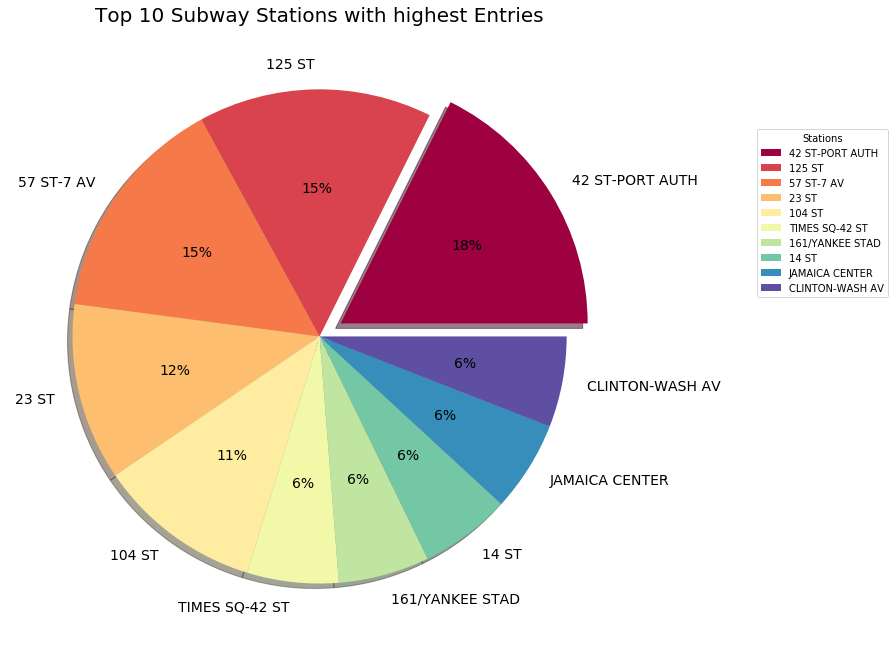

In [12]:
#Plotting the 10 Busiest Stations 
df_1 = df2["Station"].iloc[0:10]
df_2 = df2["Total_Entries_Station"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [13]:
#Exits - Total number of exits grouped by "Station", "Date", "Time"
df1_b = df.groupby(["Station", "Date", "Time"], sort=False)["Diff_Exits_Adjusted"].sum().reset_index(name ='Total_Exits')
df1_b.head()

,Station,Date,Time,Total_Exits
0,59 ST,12/30/2016,23:00:00,1.000001e+10
1,59 ST,12/30/2016,19:00:00,1.000001e+10
2,59 ST,12/30/2016,15:00:00,1.000001e+10
3,59 ST,12/30/2016,07:00:00,1.000000e+10
4,59 ST,12/30/2016,03:00:00,1.000000e+10


In [14]:
#Exits- Total number of passengers grouped by station
df2_b= df1_b.groupby(["Station"], sort=True)["Total_Exits"].sum().reset_index(name ='Total_Exits_Station')
df2_b.head(10)

,Station,Total_Exits_Station
0,1 AV,6.190012e+12
1,103 ST,1.305119e+11
2,103 ST-CORONA,5.001255e+10
3,104 ST,4.933999e+13
4,110 ST,5.000338e+10
5,111 ST,7.002297e+10
6,116 ST,2.005937e+13
7,116 ST-COLUMBIA,2.968476e+10
8,121 ST,3.000358e+10
9,125 ST,2.709350e+11


In [15]:
#Exits- Sorting the total number os passengers in descending order
df2_b = df2_b.sort_values(by='Total_Exits_Station', ascending=False)
df2_b.head()

,Station,Total_Exits_Station
84,57 ST-7 AV,7.339997e+13
3,104 ST,4.933999e+13
85,59 ST,2.117000e+13
68,42 ST-PORT AUTH,2.093001e+13
46,23 ST,2.089198e+13


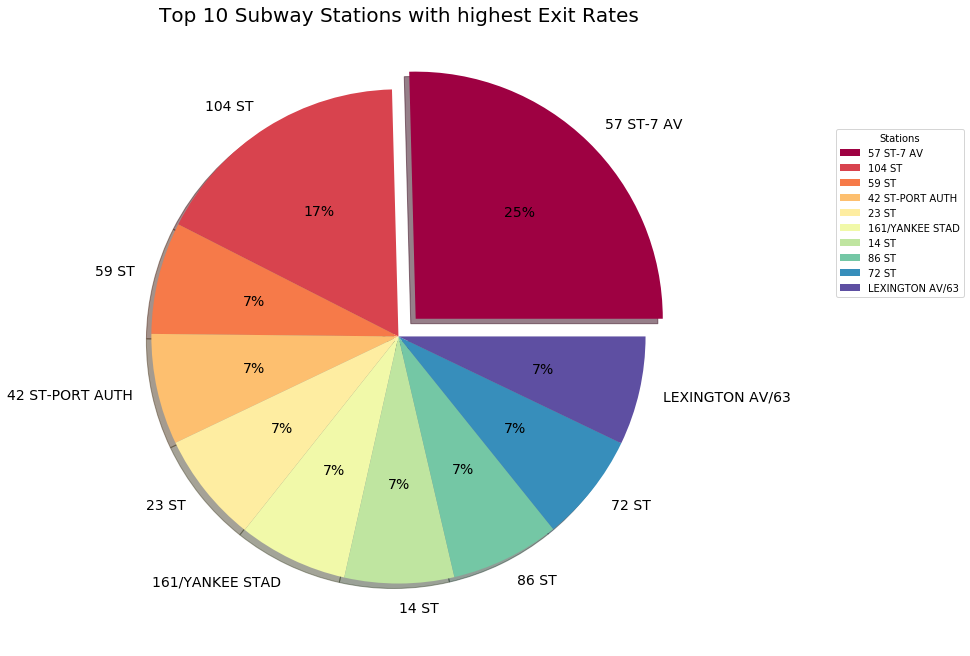

In [16]:
#Plotting the 10 busiest exits 
df_1 = df2_b["Station"].iloc[0:10]
df_2 = df2_b["Total_Exits_Station"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Exit Rates", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()